In [20]:
import requests
import seaborn as sns
import pandas as pd
import json

In [21]:
url = 'https://api.nal.usda.gov/fdc/v1/foods/list?&api_key=ICu1Wkkiw8z5iPRhXavSJCTnKxhi2aDPzbCmzcyN'

response = requests.get(url)

response = response.json()

print(response)

[{'fdcId': 2353623, 'description': 'A Low-Starch and High-Fiber Diet Intervention Impacts the Microbial Community of Raw Bovine Milk', 'dataType': 'Experimental', 'publicationDate': '2022-10-28', 'foodNutrients': []}, {'fdcId': 2341752, 'description': 'Abalone', 'dataType': 'Survey (FNDDS)', 'publicationDate': '2022-10-28', 'foodCode': '26301110', 'foodNutrients': [{'number': '203', 'name': 'Protein', 'amount': 21.2, 'unitName': 'G'}, {'number': '204', 'name': 'Total lipid (fat)', 'amount': 6.12, 'unitName': 'G'}, {'number': '205', 'name': 'Carbohydrate, by difference', 'amount': 7.46, 'unitName': 'G'}, {'number': '208', 'name': 'Energy', 'amount': 177, 'unitName': 'KCAL'}, {'number': '221', 'name': 'Alcohol, ethyl', 'amount': 0.0, 'unitName': 'G'}, {'number': '255', 'name': 'Water', 'amount': 62.7, 'unitName': 'G'}, {'number': '262', 'name': 'Caffeine', 'amount': 0.0, 'unitName': 'MG'}, {'number': '263', 'name': 'Theobromine', 'amount': 0.0, 'unitName': 'MG'}, {'number': '269', 'name'

In [42]:
def Foods():
    pageNum = 1
    foods = []

    while True:
        url = 'https://api.nal.usda.gov/fdc/v1/foods/list?&api_key=ICu1Wkkiw8z5iPRhXavSJCTnKxhi2aDPzbCmzcyN&pageSize=200&pageNumber=' + str(pageNum) 
        req = requests.get(url)
        if not req.ok:
            break
        foods = foods + req.json()
        pageNum += 1
        
    return foods
    
    


In [43]:
listOfFoods = Foods()
print(listOfFoods)

[{'fdcId': 2353623, 'description': 'A Low-Starch and High-Fiber Diet Intervention Impacts the Microbial Community of Raw Bovine Milk', 'dataType': 'Experimental', 'publicationDate': '2022-10-28', 'foodNutrients': []}, {'fdcId': 2341752, 'description': 'Abalone', 'dataType': 'Survey (FNDDS)', 'publicationDate': '2022-10-28', 'foodCode': '26301110', 'foodNutrients': [{'number': '203', 'name': 'Protein', 'amount': 21.2, 'unitName': 'G'}, {'number': '204', 'name': 'Total lipid (fat)', 'amount': 6.12, 'unitName': 'G'}, {'number': '205', 'name': 'Carbohydrate, by difference', 'amount': 7.46, 'unitName': 'G'}, {'number': '208', 'name': 'Energy', 'amount': 177, 'unitName': 'KCAL'}, {'number': '221', 'name': 'Alcohol, ethyl', 'amount': 0.0, 'unitName': 'G'}, {'number': '255', 'name': 'Water', 'amount': 62.7, 'unitName': 'G'}, {'number': '262', 'name': 'Caffeine', 'amount': 0.0, 'unitName': 'MG'}, {'number': '263', 'name': 'Theobromine', 'amount': 0.0, 'unitName': 'MG'}, {'number': '269', 'name'

In [39]:
def getIron():
    
    iron = []
    for i in listOfFoods:
        name = i['description']
        for x in i['foodNutrients']:
            if x['name'] == 'Iron, Fe':
                amount = x['amount']
                temp = {'Name':name,'Iron':amount}
                iron.append(temp)
    return iron


In [40]:
def removeBaby(df):
    index = 0
    for entry in df['Name']:
        if "Baby" in entry:
            df.drop(index,inplace = True)
        index = index + 1
        

In [29]:
removeBaby(df)

In [26]:
data = getIron()

In [28]:
df = pd.DataFrame(data)

In [30]:
df.head()

,Name,Iron
0,Abalone,3.97
1,"Abiyuch, raw",1.61
2,"Acerola juice, raw",0.50
3,"Acerola, (west indian cherry), raw",0.20
4,Acorn stew (Apache),1.00


In [31]:
top10 = df.sort_values(by="Iron",ascending=False)
top10 = top10[0:10]

In [41]:
top10.head(10)

,Name,Iron
3367,"Cereals ready-to-eat, RALSTON Enriched Wheat B...",67.7
3451,"Cereals, QUAKER, Quick Oats with Iron, Dry",49.4
3248,"Cereal, O's, multigrain",46.6
1961,"Beef, variety meats and by-products, spleen, raw",44.6
3401,"Cereals, MALT-O-MEAL, chocolate, dry",42.9
3426,"Cereals, QUAKER, Instant Grits, Redeye Gravy &...",42.0
7711,"Lamb, variety meats and by-products, spleen, raw",41.9
3297,"Cereals ready-to-eat, MALT-O-MEAL, OAT BLENDER...",41.4
3403,"Cereals, MALT-O-MEAL, Farina Hot Wheat Cereal,...",40.9
1960,"Beef, variety meats and by-products, spleen, c...",39.4


<AxesSubplot:xlabel='Iron', ylabel='Name'>

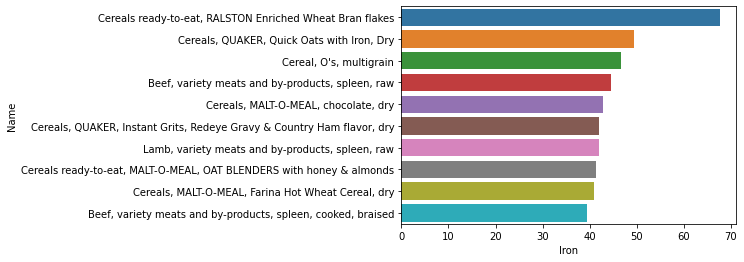

In [33]:
sns.barplot(data = top10, x = "Iron", y = "Name")

In [154]:
def removeBaby(df):
    index = 0
    for entry in df['Name']:
        if "Baby" in entry:
            df.drop(index, inplace = True)
        index+=1

<AxesSubplot:xlabel='Iron', ylabel='Count'>

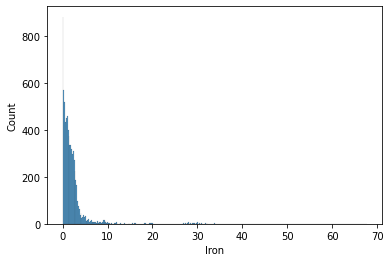

In [34]:
sns.histplot(df['Iron'])

In [35]:
df['Iron'].quantile(0.1)
# gives us the frequency at which people like iron rich foods

0.15

In [ ]:
Although very rare, anemia is a condition that results in a lack of blood within ones body, and the affects 